In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random

def data_format(data):   
    lines = data.readlines()
    data_list = [word.strip() for word in lines]

    new_data_list=[]
    for i in data_list:
        each_line=[]
        for j in range(len(i.split())):
            single_data= i.split()[j].split(':')[0]
            each_line.append(eval(single_data))
        new_data_list.append(each_line)

    labels=[]
    for i in range(len(new_data_list)):
        labels.append(new_data_list[i][0])

    for i in range(len(new_data_list)):
        new_data_list[i].pop(0)

    new_data_list_combine=[]
    for i in range(len(new_data_list)):
        x=[0]*123
        for j in new_data_list[i]:
            x[j-1]=1   
 #       x.append(1)   
        new_data_list_combine.append(x)

    X= np.array(new_data_list_combine)
    Y= np.array(labels)  
    return X,Y

In [2]:
data1 = open("/Users/xuejianye/Desktop/adult/a7a.train")
X1,Y1=data_format(data1)

data2 = open("/Users/xuejianye/Desktop/adult/a7a.test")
X2,Y2=data_format(data2)

data3 = open("/Users/xuejianye/Desktop/adult/a7a.dev")
X3,Y3=data_format(data3)

In [3]:
def svm_sgd(X,Y,n,C):
    weight = np.zeros(len(X[0]))
    b = 0
    lr = 0.1
    epochs = n
    for N in range(1,epochs+1):
        for i, x in enumerate(X):
            if (Y[i] * (np.dot(weight.T, X[i]) + b)) < 1:
                weight = weight - lr* ((1/len(X))*weight-C*(X[i]*Y[i]))
                b = b + lr*(C*Y[i])
            else:
                weight = weight-lr*(1/len(X))*weight
    weight=weight.tolist()
    weight.insert(0,b)
    
    return weight

In [4]:
def svm_train(X,Y,w):
    b = w[0]
    weight = np.asarray(w[1:])
    lr = 0.1
    epochs = 1
    for N in range(1,epochs+1):
        err_count=0
        
        for i, x in enumerate(X):
            if (Y[i] * (np.dot(weight.T, X[i]) + b)) < 0:
                err_count += 1 
        accurate_rate = 1-err_count/len(X) 
#        print('TRAINING_ACCURACY:',accurate_rate) 

    return accurate_rate

def svm_test(X,Y,w):
    b = w[0]
    weight = np.asarray(w[1:])
    lr = 0.1
    epochs = 1
    for N in range(1,epochs+1):
        err_count=0
        
        for i, x in enumerate(X):
            if (Y[i] * (np.dot(weight.T, X[i]) + b)) < 0:
                err_count += 1 
        accurate_rate = 1-err_count/len(X) 
#        print('TEST_ACCURACY:',accurate_rate) 

    return accurate_rate



def svm_dev(X,Y,w):
    b = w[0]
    weight = np.asarray(w[1:])
    lr = 0.1
    epochs = 1
    for N in range(1,epochs+1):
        err_count=0
        
        for i, x in enumerate(X):
            if (Y[i] * (np.dot(weight.T, X[i]) + b)) < 0:
                err_count += 1 
        accurate_rate = 1-err_count/len(X) 
#        print('DEV_ACCURACY:',accurate_rate) 

    return accurate_rate

In [5]:
def result(n,C):   
    print('EPOCHS: ',n)
    print('CAPACITY: C')

    w = svm_sgd(X1,Y1,n,C)
    print('TRAINING_ACCURACY:',svm_train(X1,Y1,w))
    print('TEST_ACCURACY:',svm_test(X2,Y2,w))      
    print('DEV_ACCURACY:',svm_dev(X3,Y3,w))
    print('FINAL_SVM:',w)
    

def hyperparameter_C(n,m,k):
    n=math.log10(n)
    m=math.log10(m)
    epochs=5
    C=[]
    test_accuracy=[]
    dev_accuracy=[]
    train_accuracy=[]
    interval=(m-n)/(k-1)
    for i in range(k):
        C.append(n+interval*i)
    C.sort()
        
    for j in range(len(C)):
        w=svm_sgd(X1,Y1,epochs,10**C[j])
        train_accuracy.append(svm_train(X1,Y1,w))
        test_accuracy.append(svm_test(X2,Y2,w))
        dev_accuracy.append(svm_dev(X3,Y3,w))
        
    return C,train_accuracy,test_accuracy,dev_accuracy

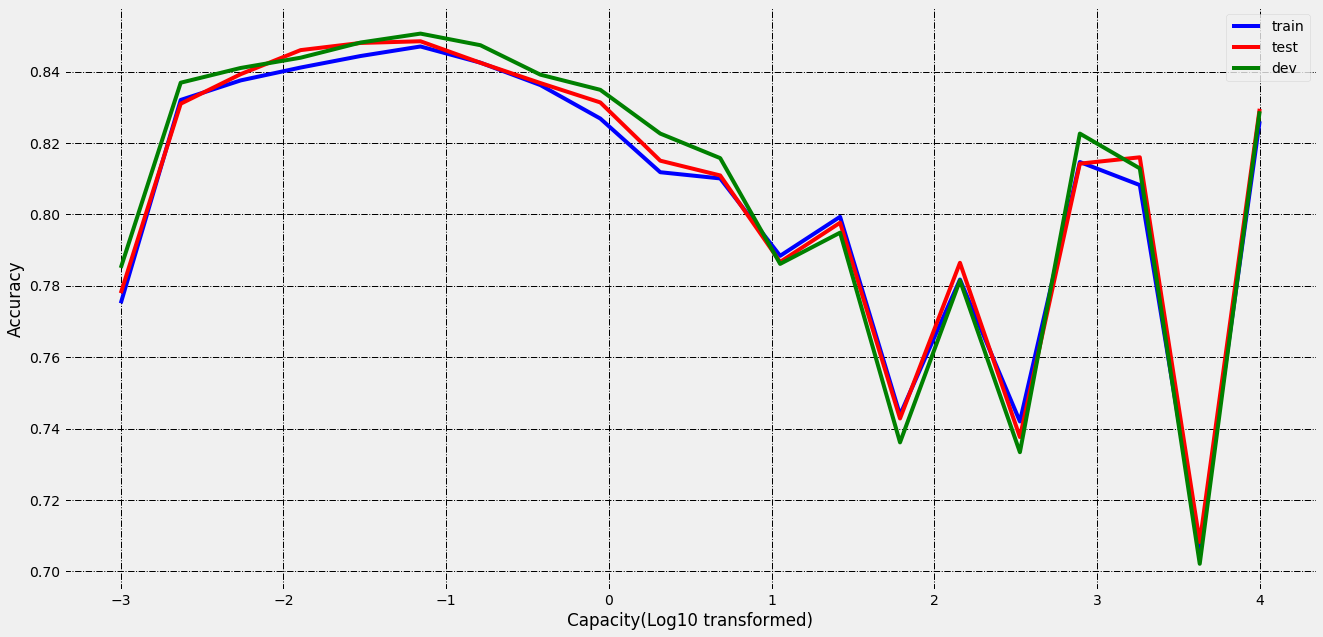

In [6]:
x,y1,y2,y3=hyperparameter_C(10**-3,10**4,20)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))
plt.plot(x,y1,color='blue', label="train")
plt.plot(x,y2,color='red', label="test")
plt.plot(x,y3,color='green', label="dev")
plt.xlabel("Capacity(Log10 transformed)")
plt.ylabel("Accuracy")
plt.grid(True, linestyle = "-.", color = "black")
plt.legend(loc='upper right')
plt.savefig('Accuracy.png')
plt.show()

In [7]:
x

[-3.0,
 -2.6315789473684212,
 -2.263157894736842,
 -1.8947368421052633,
 -1.5263157894736843,
 -1.1578947368421053,
 -0.7894736842105265,
 -0.42105263157894735,
 -0.052631578947368585,
 0.3157894736842102,
 0.6842105263157894,
 1.0526315789473681,
 1.421052631578947,
 1.7894736842105257,
 2.1578947368421053,
 2.526315789473684,
 2.894736842105263,
 3.2631578947368416,
 3.6315789473684204,
 4.0]

In [9]:
y2

[0.7779222314147264,
 0.8309892447701217,
 0.8392624985226332,
 0.8459992908639641,
 0.8480085096324311,
 0.8484812669897175,
 0.8424536106843162,
 0.8367805223968798,
 0.8313438127880866,
 0.8150336839617067,
 0.8108970570854509,
 0.7866682425245243,
 0.7976598510814324,
 0.7428199976362132,
 0.7864318638458812,
 0.737619666706063,
 0.8142063585864555,
 0.8159791986762794,
 0.7081905212149864,
 0.8295709726982626]